In [16]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/preprocessed.csv")
df.drop_duplicates(subset = "name", keep=False, inplace=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maryx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maryx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maryx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Universal Sentence Encoder
The Universal Sentence Encoder encodes text into high-dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks. It is a pre-trained model created by Google that uses sources like Wikipedia, web news, web question-answer pages, and discussion forums. There are two variations of the model, one trained with Transformer encoder and the other with Deep Averaging Network (DAN). The one with Transformer encoder is computationally more intensive but provides better results, while DAN trades accuracy for lower computational requirements. In our works, the model with DAN has provided results with high accuracy so we do not require the Transformer encoder alternative. The input is a variable-length English text and the output is a normalised 512-dimensional vector.

In [12]:
embeddings = pd.read_csv('embeddings.csv', index_col=0)
embeddings.head()

0         1         2         3         4  \
name                                                                   
MONGODB, INC.      -0.048347 -0.048348 -0.047972  0.048348 -0.048074   
SALESFORCE COM INC -0.048440 -0.048481 -0.011648  0.048481 -0.048470   
SPLUNK INC         -0.047489 -0.047792 -0.047772  0.047791 -0.047792   
OKTA, INC.         -0.048333 -0.048679 -0.026585  0.048682 -0.048568   
VEEVA SYSTEMS INC  -0.045855 -0.045855 -0.045855  0.045855 -0.045854   

                           5         6         7         8         9  ...  \
name                                                                  ...   
MONGODB, INC.       0.024746 -0.040604 -0.048346  0.048348 -0.048348  ...   
SALESFORCE COM INC  0.020522  0.000173 -0.048477  0.048317 -0.048481  ...   
SPLUNK INC         -0.047775 -0.047787 -0.047636  0.047789 -0.047758  ...   
OKTA, INC.          0.048673 -0.010152 -0.046081  0.048555 -0.048633  ...   
VEEVA SYSTEMS INC   0.045855 -0.045855 -0.045855  0.045855 -0.045855  ...   

                         502       503       504       505       506  \
name                                                                   
MONGODB, INC.      -0.048325 -0.048348 -0.048348  0.021898  0.047686   
SALESFORCE COM INC -0.047321 -0.048481 -0.048481 -0.016805  0.048388   
SPLUNK INC         -0.046150 -0.047792 -0.047792 -0.047715  0.047761   
OKTA, INC.         -0.048677 -0.048682 -0.048682 -0.001725  0.048465   
VEEVA SYSTEMS INC  -0.045855 -0.045855 -0.045855 -0.040072 -0.045855   

                         507       508       509       510       511  
name                                                                  
MONGODB, INC.      -0.047848  0.046755  0.048289 -0.048348 -0.041822  
SALESFORCE COM INC -0.032797  0.046606  0.017406 -0.048481 -0.040719  
SPLUNK INC         -0.047766  0.047790  0.047792 -0.047792 -0.047661  
OKTA, INC.         -0.046822  0.048279  0.048415 -0.048682 -0.047951  
VEEVA SYSTEMS INC  -0.044339  0.045855  0.045855 -0.045855 -0.045141  

[5 rows x 512 columns]

## Plotting

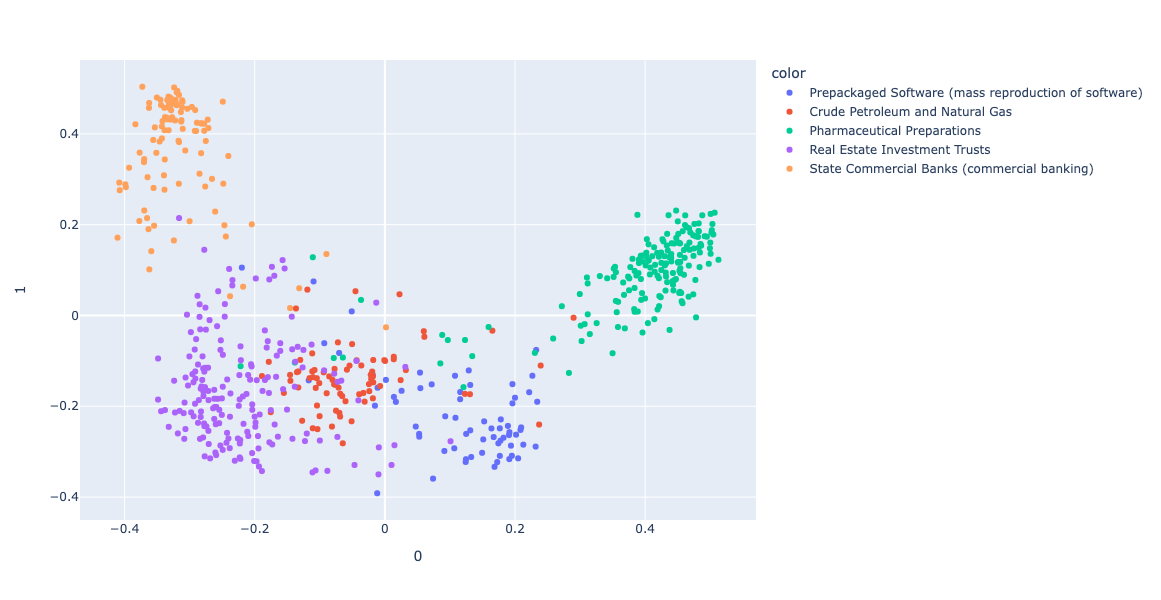

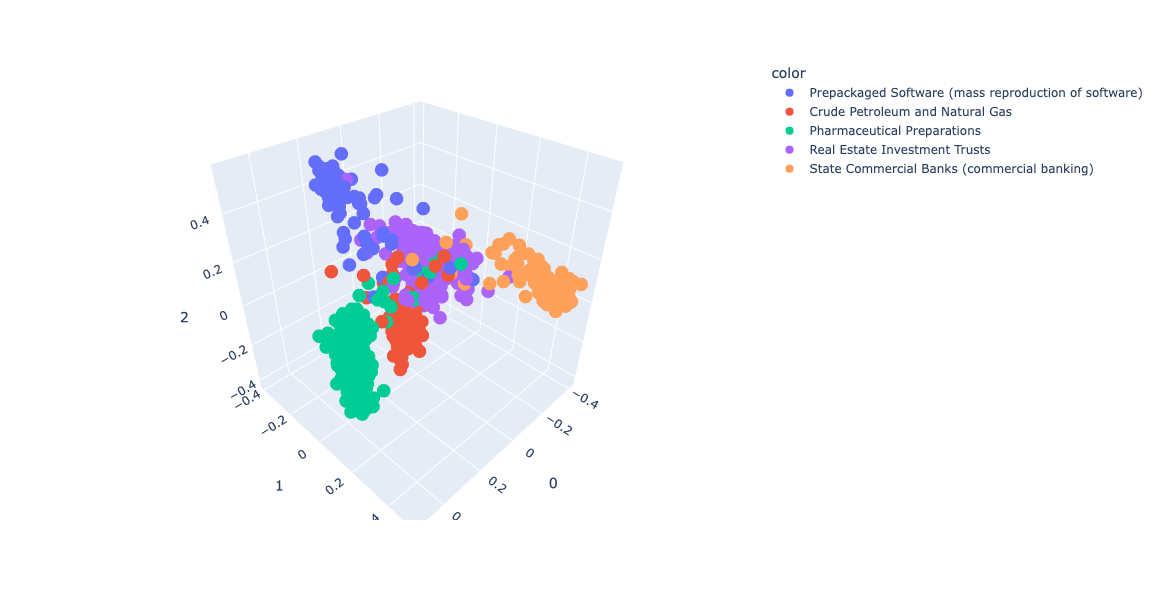

In [13]:
plot_d2v = std_func.pca_visualize_2d(embeddings, df.loc[:,["name","SIC_desc"]])
std_func.pca_visualize_3d(plot_d2v)

##  Performance Evaluation 

C:\Users\maryx\Desktop\School\Year 4\STAD95\report\ubineer_nlp_research\content\mary\..\std_func.py:139: FutureWarning:

Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.



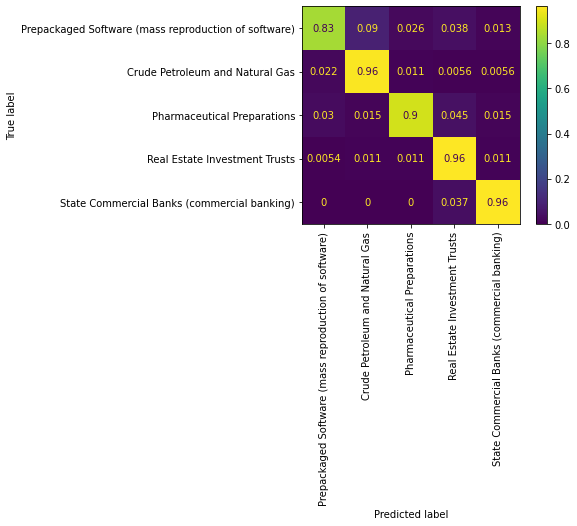

In [22]:
dot_product_df, accuracy, cm = std_func.dot_product(embeddings,df)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(dot_product_df["y_true"], dot_product_df["y_pred"], target_names=df["SIC_desc"].unique()))

                                                      precision    recall  f1-score   support

Prepackaged Software (mass reproduction of software)       0.90      0.83      0.87        78
                     Crude Petroleum and Natural Gas       0.95      0.96      0.95       180
                         Pharmaceutical Preparations       0.91      0.90      0.90        67
                       Real Estate Investment Trusts       0.94      0.96      0.95       185
         State Commercial Banks (commercial banking)       0.95      0.96      0.96       108

                                            accuracy                           0.94       618
                                           macro avg       0.93      0.92      0.93       618
                                        weighted avg       0.94      0.94      0.94       618



From the confusion matrix and the classification report, we can conclude that the Universal Sentence Encoder model does a good job at classifying the category of the companies. More specifically, this model is best at classifying companies in the Crude Petroleum & Natural Gas, Real Estate and Commerical Banking industries.